Collaborators 

* Student names:
>- Tony Kithinji
>- Janet Khainza
>- Leah George
>- Rael Ndonye
>- Tony Munene 
>- Isaac Munyaka
 
* Student pace: part time : **PT03**


# SIXTH SENSE AGENCY HOUSE PREDICTION MODEL

In [38]:
# #@title
# from IPython.display import Image
# image_path = "/content/house_image.jpg"
# Image(filename=image_path)

# 1.0 Business Understanding

## 1.1 Background

The housing market in King County, Washington experienced a shift in March, 2023, with home prices declining by approximately 10% compared to the previous year. The decrease in prices was attributed to factors such as interest rate increases and economic uncertainty. However, despite the price drop, housing affordability remained a challenge for many potential buyers. Inventory shortages and a lack of new listings were significant concerns, leading to increased competition among buyers. The number of available homes was considerably lower than the previous year, which impacted the overall sales activity in the market.

Overall, the declining home prices, the challenges of affordability, the scarcity of inventory, and the impact of economic factors on the market are very important factors to consider before conducting any analysis on the king county market.

Reference : https://www.seattletimes.com/business/real-estate/king-country-home-prices-plunge-10-as-northwest-housing-market-shifts/

## 1.2 Problem Statement

The 6th Sense Agency is a premier real estate agency in King County, Washington DC, dedicated to providing exceptional client support in buying, selling, and renting houses. To maintain a competitive edge, deliver superior services and provide affordable housing, the agency has contracted us to provide them with trusted insights  and factors that influence the price of a house in order for them to have a deep understanding of the current real estate market as well as make informed decisions to meet the changing needs of buyers and sellers while improving sales.

## 1.3 Objectives


The main goal of this research project is to identify and analyze the key factors that have a significant influence on house prices in King County. By doing so, the 6th Sense Agency aims to enhance its ability to adapt quickly to market dynamics and offer exceptional service to its clients while improving their sales.

To achieve this objective, the research will address the following questions:

> Q1:  What is the correlation between house price and other predictor variables?

> Q2: Which combinations of features provide the most accurate predictions for housing prices?



> Q3: Do renovations of a house contribute to a higher house pricing?

-------

>- **Null Hypopthesis: House price is not affected by features of the house presented**
>- **Alternative hypothesis: House price is greatly affected by presented features**

------


By analyzing these questions, the research aims to gain valuable insights into the factors that play a crucial role in determining house prices. The findings will empower the 6th Sense Agency to make informed decisions and effectively meet the needs of its clients.

In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


First, we import all libraries to be used in this project.

In [40]:
# Import Libraries
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.core.internals.blocks import is_string_dtype
from pandas.core.dtypes.api import is_numeric_dtype


warnings.filterwarnings('ignore')

In [41]:
# loading the dataset
data = pd.read_csv('/content/drive/MyDrive/project_02/kc_house_data.csv')
# data = pd.read_csv('kc_house_data.csv')
data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17208,2770604346,7/5/2014,499000.0,3,2.50,1540,1326,3.0,NaN,NONE,...,8 Good,1390,150.0,1995,NaN,98119,47.6457,-122.374,1680,1592
9376,3388300730,9/10/2014,550388.0,3,3.00,1720,70567,1.0,NO,AVERAGE,...,7 Average,1720,0.0,1966,0.0,98027,47.4936,-122.069,2740,70567
9218,925049278,3/4/2015,607000.0,4,2.00,1490,4054,1.5,NO,NONE,...,7 Average,1490,0.0,1926,0.0,98115,47.6744,-122.301,1510,3889
13252,9144100035,3/24/2015,350000.0,3,1.00,1680,8010,1.0,NO,NONE,...,7 Average,840,840.0,1951,0.0,98117,47.6993,-122.376,1890,8778
13149,1072100085,5/14/2014,310000.0,3,1.00,1480,7830,1.0,NO,NONE,...,7 Average,1480,0.0,1952,0.0,98133,47.7703,-122.336,1450,7830
1972,4443801160,6/10/2014,420000.0,2,1.00,860,3880,1.0,NO,NONE,...,6 Low Average,860,0.0,1916,0.0,98117,47.6862,-122.391,1230,4260
8648,798000062,8/1/2014,286000.0,3,1.75,1770,9000,1.0,NO,NONE,...,7 Average,1090,680.0,1954,0.0,98168,47.4997,-122.326,1520,21141
1052,2553300030,6/9/2014,648000.0,4,2.50,2380,13435,2.0,NaN,NONE,...,10 Very Good,2380,0.0,1992,0.0,98075,47.5833,-122.028,2730,9677
17014,1788300010,12/11/2014,179950.0,2,1.00,1200,9000,1.0,NO,NONE,...,6 Low Average,1200,0.0,1958,0.0,98023,47.3277,-122.349,1040,9600
9628,6821102346,5/22/2014,505000.0,3,2.25,1670,1596,2.0,NO,NONE,...,8 Good,1220,450.0,2002,0.0,98199,47.6474,-122.396,1670,1596


# 2.0 Data Understanding

The data is a collection of single family homes in the King County, WA area sold between May 2014 and May 2015. The data contains 21 variables and 21,597 records. This data will be suitable to create a model to predict sale price for homes within the paramaters of this dataset.

### Table 1 Variable Names and Descriptions for King County Data Set


* id	- Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
* view - Quality of view from house
* condition	-	How good the overall condition of the house is. Related to maintenance of house
* grade - Overall grade of the house. Related to the construction and design of the house
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [42]:
# Total number of rows and columns.

print("The number of rows is", data.shape[0])
print('The number of columns is', data.shape[1])

The number of rows is 21597
The number of columns is 21


In [43]:
# Viewing the columns of the dataset, the data type and if there are any null values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [44]:
# Viewing the statistical summary of the dataset.

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Observations

>

*  Our data consists of 21597 rows and 21 columns
* The dataset contain a mix of numerical and categorical data types.
*  Waterfront, view and year_renovate have missing values
* We can also see the statistical summary of the numerical records based on their count, mean, median, standard deviation,percentiles, minimum and maximum values.
* We can notice that there is 33 bedrooms which might be an outlier

Below are the statistics of price as our target variable:

- mean of approximately $540k

- median of $450k

- standard deviation of approximately $367k

- min and max values of $78k and \$7.7M respectively

- 25th and 75th percentile values of $322k and \$645k respectively




## Firstly let's visualize the distribution of houses and their prices on a map, to understand the locality distribution


In [45]:
latitudes = data['lat']
longitudes = data['long']
prices = data['price']

fig = go.Figure(data=go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=10,
        color=prices,
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(
            title='Price'  # Add a title to the colorbar
        )
    ),
))

fig.update_layout(
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiY2luamkiLCJhIjoiY2xpNzNsZGRtMXdoeTNpbHBvaHpvYjVkNiJ9.DaQ9b5_qWWelaTEzyqJt9w',
        center=dict(
            lat=data['lat'].mean(),
            lon=data['long'].mean()
        ),
        zoom=10
    ),
    title='Distribution of Houses by Coordinates',
    width=1500,  # Adjust the width of the map
    height=1000  # Adjust the height of the map
)

fig.show()

The data was collected from states of Seattle, Mearcer Island
Most houses are below 2 million in price and the most expensive houses are clustered in the same area.

# 3.0 Data Preparation

## 3.1 Data Cleaning

**Identify and remove duplicated records**

In [46]:
# Any dulplicated homes?
duplicates_len = len(data[data.duplicated(subset=['id'], 
                                      keep=False)].sort_values(by='id'))

print(f"Results:\nThere are {duplicates_len} duplicated records.")
data[data.duplicated(subset=['id'], keep=False)].sort_values(by='id').head(4)

Results:
There are 353 duplicated records.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,NO,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,NaN,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969


The duplicated records based on ID are from the same homes that sold within the same year. <br>These homes have the same attributes except for sale date.<br> These may be homes that were flipped or sold quickly after an initial sale. <br>We will keep these records because we are interested in predicting a home's sale price and these give more data for the true value of a house.

**Identifying Missing values**

In [47]:
# How many columns have NaN?
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [48]:
# check for placeholders
# Look for top occuring values
print('King County, WA \n Home Sales Dataframe\n')
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize = True).head(10), '\n')

King County, WA 
 Home Sales Dataframe

id 
 795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
1524079093    0.000093
4305200070    0.000093
1450100390    0.000093
7893805650    0.000093
109200390     0.000093
Name: id, dtype: float64 

date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
3/25/2015    0.005695
7/9/2014     0.005603
4/14/2015    0.005603
4/28/2015    0.005603
4/22/2015    0.005603
Name: date, dtype: float64 

price 
 450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 

bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 



## Observations

**Missing values results**
1. NaN
*waterfront*

*   Binary categorical variable (YES or NO)
*   replace NaN with mode of NO as most likely these properties are not waterfront

*view*

*   Ordinal categorical variable 
*   replace NaN with NONE

*yr_renovated*

   - Will rename yr_renovated to renovated and changed to countable numerical variable
   - 0 is the most common value with over 95% of values.
   - Replace NaN with 0 value



2. Placeholder
*   yr_renovated has 0 for missing or unknown values.
*   sqft_basement has ? for missing or unknown values.

In [49]:
# Was a house renovated or not?

data.yr_renovated.fillna('NO',inplace=True) # replace null with 0 the most common value

data['yr_renovated'] = data['yr_renovated'].replace(0.0, 'NO') # Replace zero with NO

data.loc[data['yr_renovated'] != 'NO', 'yr_renovated'] = 'YES' # Replace the years with YES, as these were renovated

data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

data.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,NO,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,YES,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NO,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,NO,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,NO,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,NO,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,NO,98003,47.3097,-122.327,2238,6819


In [50]:
# data cleaning

def process_data(data):
    # Dropping unwanted columns
    data.drop(['date', 'id', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

    data['sqft_basement'] = data['sqft_basement'].str.replace(r'\W', '').replace('', np.nan).astype(float)  # replacing special characters and converting dtype
    data['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True)  # replaced null in sqft_basement with median
    data['waterfront'].fillna('NO', inplace=True)  # replaced null in waterfront with NO
    data['view'].fillna('NONE', inplace=True)  # replace nulls in view with None
    data['bedrooms'] = data['bedrooms'].replace(33, 3)  # replaces 33 with 3 because clearly that's an outlier

    return data
    
data = process_data(data)

### Assumptions
>- Without additional information Zipcode is not reliable as a location factor as latitude and longitude. e.g  <br> Based on our code latitude and longitude are more precise markers. <br>
>- Dropped 'sqft_living15', 'sqft_lot15' to focus on the particular house with its sqft_living and sqft_lot
>- Null values in waterfront replaced with NO as the mode.
>- Replaced 33 bedroomed house with 3 rooms as it made no sense judging from its price and its a 1-floor house. This is clearly an input error


In [51]:
# to confirm that we do not have any more null values
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
lat              0
long             0
dtype: int64

In [52]:
#check the unique values of the categorical attributes
print("waterfront:", data['waterfront'].unique())
print()
print("views:", data['view'].unique())
print()
print("grade:", data['grade'].unique())
print()
print("conditions:", data['condition'].unique())

waterfront: ['NO' 'YES']

views: ['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

grade: ['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']

conditions: ['Average' 'Very Good' 'Good' 'Poor' 'Fair']


## 3.2 Exploratory Data Analysis



### 1. Univariate analysis

We will visualise the summary statistics of each individual predictor variable in the dataset.

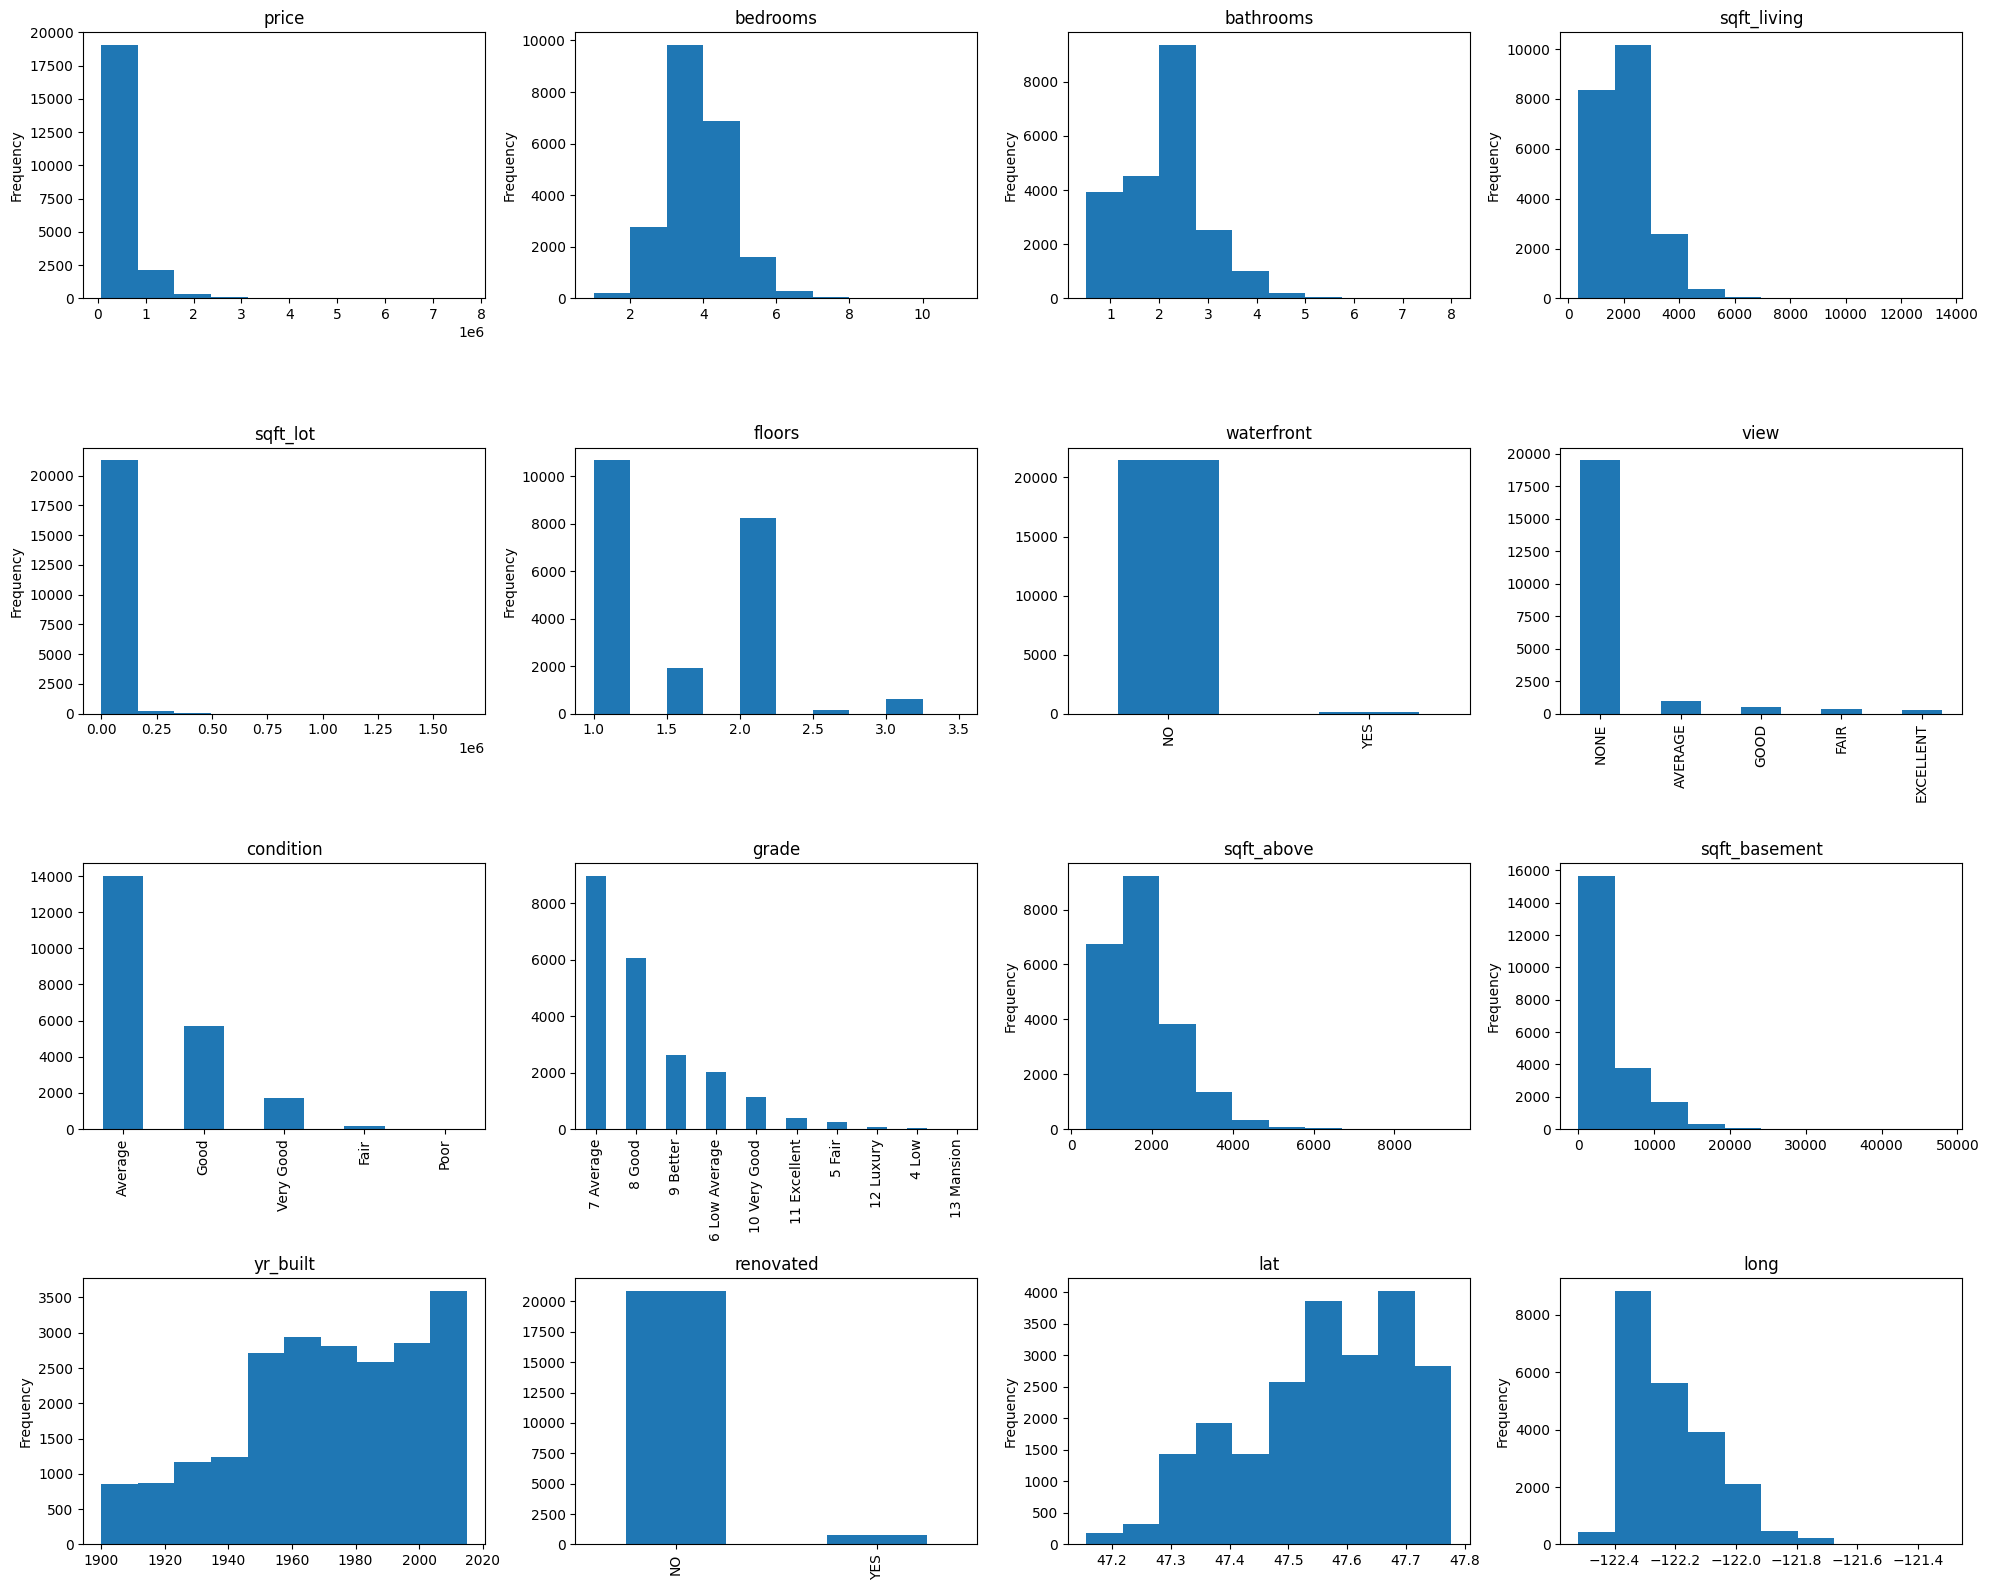

<Figure size 640x480 with 0 Axes>

In [53]:
# Create a list of columns to plot
columns_to_plot = data.columns

# Calculate the number of rows and columns for the subplots
num_rows = len(columns_to_plot) // 4 + (len(columns_to_plot) % 4 > 0)
num_cols = min(len(columns_to_plot), 4)

# Create the figure and axes objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array if it's a single row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Iterate over the columns and plot on each subplot
for i, column in enumerate(columns_to_plot):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    ax.set_title(column)

    if is_numeric_dtype(data[column]):
        data[column].plot(kind='hist', ax=ax)
    elif is_string_dtype(data[column]):
        data[column].value_counts()[:10].plot(kind='bar', ax=ax)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as a PDF with reduced DPI
plt.savefig('histogram.pdf', format='pdf', dpi=80)


Represented continous data with histogram and categorical data with bargraphs <br>
Observations from the above histograms and bargraphs:
1. 'price' is right skewed. Meaning it is not symmetrical.
2. 'bedrooms' and 'bathrooms' look to be discrete counts of those home features, as does 'floors'. 
3. 'sqft_above', 'sqft_living', 'sqft_basement' and 'sqft_lot' all look to be continuous, so is 'price'. 

In conlusion, we can note both the presence of some extreme outliers and data skewness in most of the distributions.







*  A box plot to visualize the 'price' distribution.




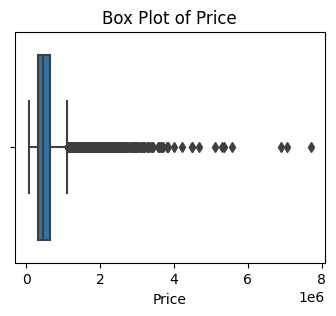

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.savefig('boxplot.pdf', format='pdf')

The box represents the interquartile range (IQR), with the horizontal line inside indicating the median. The whiskers extend to the minimum and maximum non-outlier values, while any data points outside the whiskers are considered outliers.

The observation made is that there are a lot of outliers in the 'price' variable, as indicated by the data points outside the whiskers of the box plot. 
We will maintain the outliers because it could be a true indication of houes prices in King County.

### 2. Bivariate Analysis

**Converting categorical to Numerical**

In [55]:
def convert_categorical_to_numerical(data):
    # Mapping for 'renovated'
    renovated_mapping = {'NO': 0, 'YES': 1}
    data['renovated'] = data['renovated'].replace(renovated_mapping).astype(float)

    # Mapping for 'view'
    view_mapping = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
    data['view'] = data['view'].replace(view_mapping).astype(float)

    # Mapping for 'condition'
    condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
    data['condition'] = data['condition'].replace(condition_mapping).astype(float)

    # Mapping for 'waterfront'
    waterfront_mapping = {'NO': 0, 'YES': 1}
    data['waterfront'] = data['waterfront'].replace(waterfront_mapping).astype(float)

    # Mapping for 'grade'
    data['grade'] = data['grade'].map(lambda x: int(x[0:2]))

    return data

data = convert_categorical_to_numerical(data)

Converting categorical to numerical values allows for mathematical operations to be performed on those variables e.g logarithm transformation, improve model performance etc.



**Correlation between the target variable (Price) and the predictors.**




In [56]:
# setting the target variable as price; check how the predictor variables correlate with price and identify the highest correlated

data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315954
lat              0.306692
waterfront       0.264306
floors           0.256804
renovated        0.117543
sqft_lot         0.089876
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64

From the results, sqft_living has the highest correlation with price.

grade, sqft_above and bathrooms have a considerably higher correlation with price. This knowledge will guide us in the predictor variables we choose for the model.
long, yr_built and sft_lot have a lower correlation wit price.

 

**Visualization of the correlation between all the variables using a heat map**

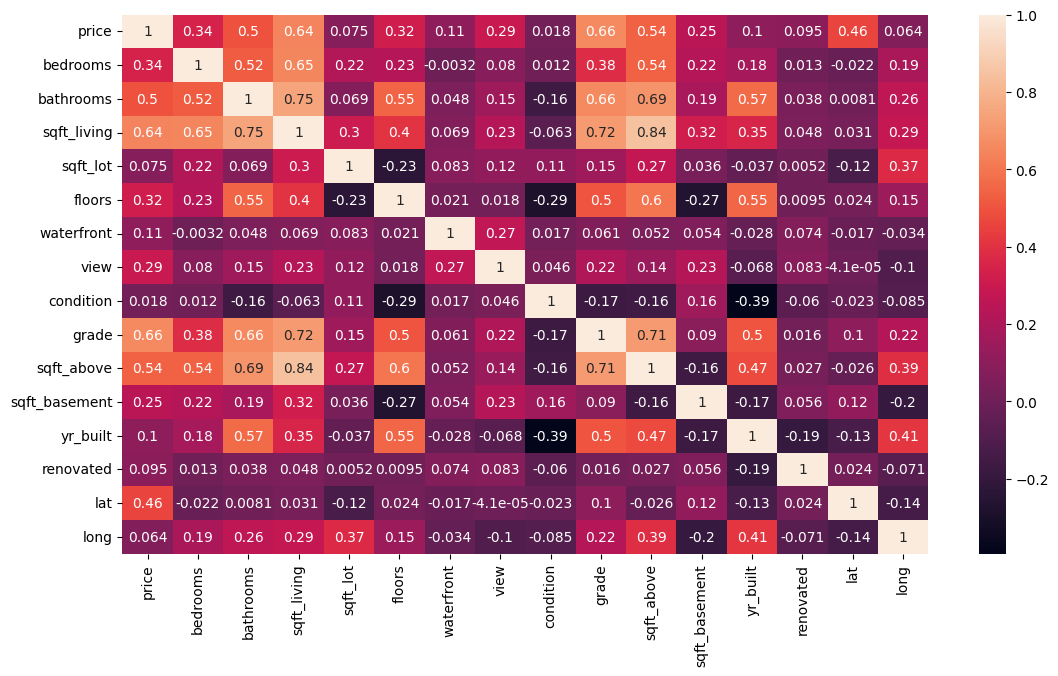

In [57]:
# Visualizing the correlation between all the variables

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(method='spearman', numeric_only=True), annot=True);

The above correlation heatmap provides a clear and concise way to understand the correlation structure of the dataset. We can be able to see the relationship between different variables.

sqft_living, bathrooms, grade and sqft_above have 0.7 and above multicollinearity. Based on this information we have to make a decision on the predictors that will satisfy our objectives. This strategy will help avoid using predictors that are highly correlated making our model inaccurate.



















*   Next, we will visualize the distribution and variation of the 'price' variable across different predictor variables.

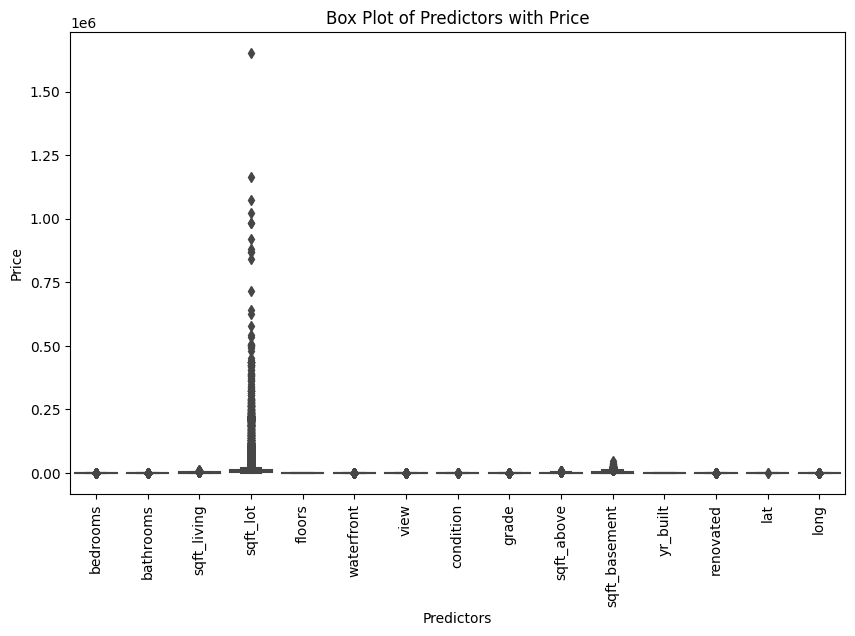

In [58]:
 # Selecting the features to plot (excluding 'price')
X = data.drop('price', axis=1)

# Creating a new DataFrame by concatenating the selected features with 'price'
#data_concat = pd.concat([X, data['price']], axis=1)

# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.boxplot(X)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Predictors')
plt.ylabel('Price')
plt.title('Box Plot of Predictors with Price')

# Show the plot
plt.show()

From the above box plot:
1. we are able to see the spread and variability of the predictor variables in relation to the target variable ('price') 
2. From the distributions we can see some outliers especially in 'sqft_lot'.

Dropping the sqft_lot seems like a good idea because it presents some significant outliers and in addition its correlation with our target variable is significantly low.




*   Plotting the Predictors vs. Price





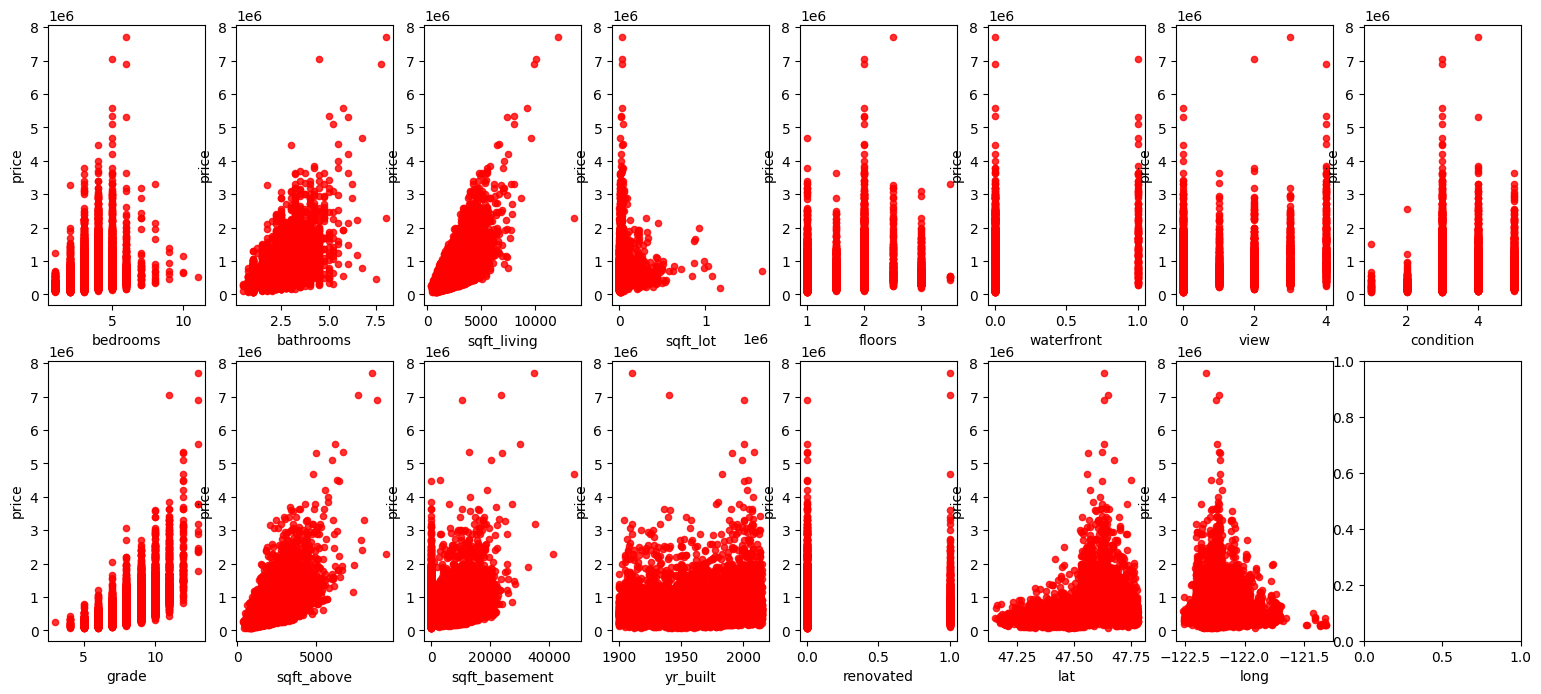

In [59]:
# setup figure
fig, axes = plt.subplots(2,8, figsize=(19, 8))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='price', ax=ax, alpha=0.8, color='r')



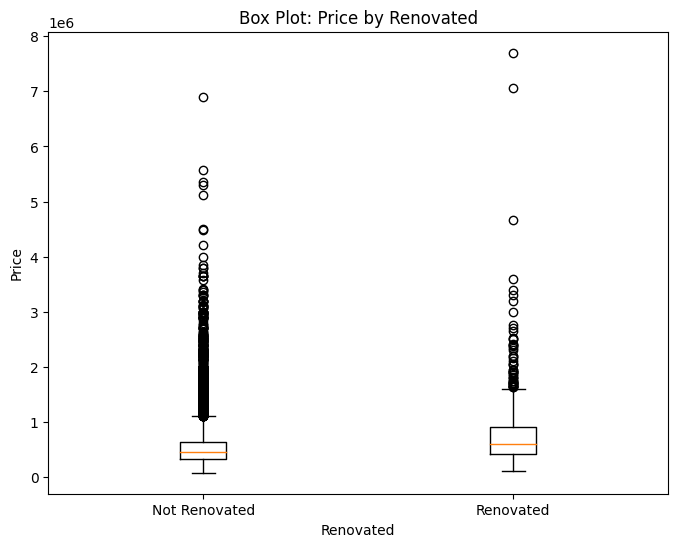

In [60]:
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['renovated'] == 0]['price'], data[data['renovated'] == 1]['price']], labels=['Not Renovated', 'Renovated'])
plt.xlabel('Renovated')
plt.ylabel('Price')
plt.title('Box Plot: Price by Renovated')
plt.show()

**Observations**

* There is a strong positive linear relationship between price, our target variable and our predictors, bathrooms, sqft_living and sqft_above. We can conclude that the forementioned predictors shhould be considered when buying or reenovating a house to sell.

* It is quite interesting from our visualization of the dataset that most expensive house are 2-floors. This is different from our general knowledge that houses with more floors are way more expensive.

* A house being at a waterfront is not as significant when it comes to pricing. We have an almost equal relationship between the two categories.

* We can also see that the houses with a higher grade are more expensive.

* Renovations increase the price of a house based on the final boxplot above. infact the outliers identified in the target variables have renovations improvement on them. 


**Check for Multicollinearity**

*  Variance Inflation Factor (VIF)




In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_data=data.drop(['price'], axis=1)
X_data = add_constant(X_data)
vif = pd.DataFrame([variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])], index=X_data.columns, columns=['VIF'])
vif = vif.sort_values(by='VIF', ascending=False)

vif

,VIF
const,1.280824e+06
sqft_living,1.466746e+02
sqft_above,1.189174e+02
sqft_basement,3.305468e+01
bathrooms,3.359396e+00
grade,3.134467e+00
yr_built,2.343030e+00
floors,1.962947e+00
bedrooms,1.700850e+00
long,1.419987e+00


Interpreting VIF values:

VIF = 1: No multicollinearity. The predictor variable is not correlated with any other predictors in the model.

VIF > 1 and < 5: Moderate multicollinearity. The predictor variable is correlated with other predictors, but it is not highly problematic.

VIF ≥ 5: High multicollinearity. The predictor variable is strongly correlated with other predictors, and it may be necessary to address the multicollinearity issue in the model.

# 4.0 Model Development

### 4.1 Build a baseline simple linear regression model




**Preparing data for modelling**



In [62]:
#make a copy of tha data to be used
house = data.copy(deep=True)

In [63]:
# Regression variables to be used
y = house['price']  #target
X_baseline = house[['sqft_living']] #predictor

* Simple Linear Regression

We use sqft_living to build the baseline model because it is highly correlated with price.

In [64]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline)).fit()

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:21:52   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Model observations
Our baseline model is statistically significant shown by the sqft_living coefficient and intercept pvalues of zero,less that our alpha of 0.05.

* The model explains about 49% of variance in price.

* zero 'sqft_living' has a reduction in price of about $44k. This knowledge is not necessary important but it helps us analysis our model.

* For a unit increase in square foot of living, there is $280k increase in price.

* We shall work to reduce our condition number which is considerably large and increase our r-squared.

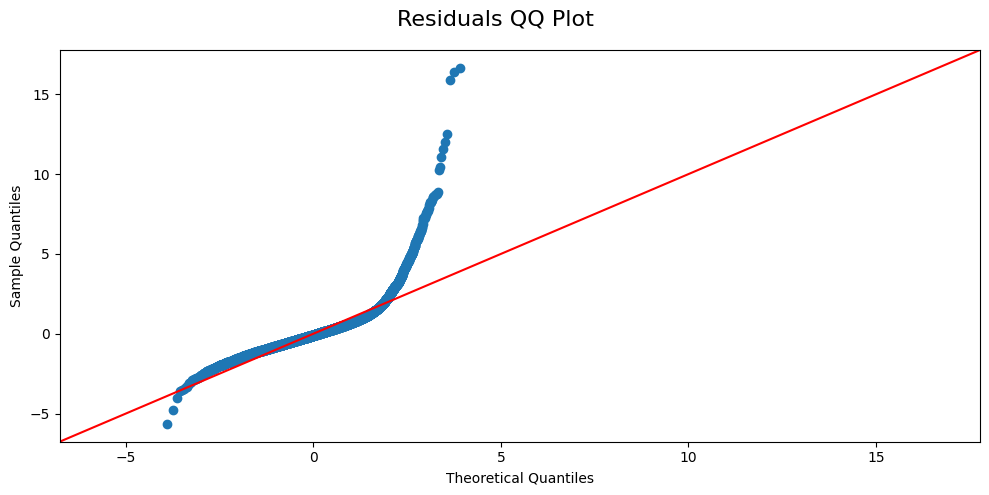

In [65]:
# Residual plot
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()
plt.tight_layout()

From the above, the residuals defy the assumption of normalcy.

Clearly, our model does not pass the goodness of fit requirement. 


### 4.2 Multiple Linear Regression

In [66]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'renovated', 'lat', 'view', 'condition', 'grade']]
# X = house[['sqft_living', 'bedrooms', 'grade']]
y = house['price']

X_pred = sm.add_constant(X)

#building the model
model =  sm.OLS(y, X_pred) .fit()

#getting the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4108.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:21:53   Log-Likelihood:            -2.9520e+05
No. Observations:               21597   AIC:                         5.904e+05
Df Residuals:                   21585   BIC:                         5.905e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.158e+07   5.61e+05    -38.490      

#### Model Observations

The model is statistically significant, the p-values of the predictor coefficients are less that our alpha.

* The model now explains about 68% variance in our price. an improvement from our simple model. Introducing more variables has improved our model performance.

* The model condition number has reduced but still significantly high.

* The 'yr-built' variable shows that older houses sell for less price. An additional age reduces the house price by about $3k

* Any change in 'renovation' variable increases the price by about $54k

* It is also interesting that an additional bedroom and sqft_lot reduces the price of the house. that is quite strange based on our background knowledge. 

We will standardize the variables and assess whether there is an improvement in our model


* Normality

 A Q-Q plot that compares the distribution of the residuals to a theoretical Gaussian (normal) distribution. 


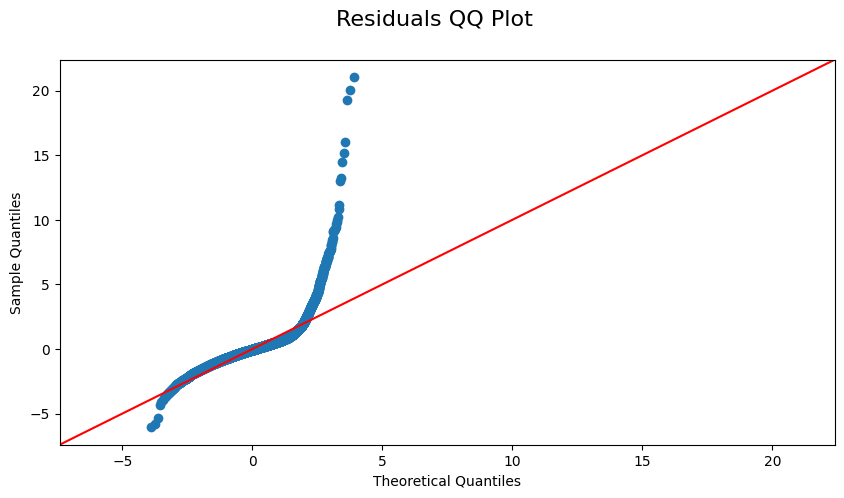

In [67]:
# Residual plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

* We can see from the residual qq-plot above that the residuals do not follow a normal distribution.

* Deviations from this pattern may indicate nonlinearity or heteroscedasticity (unequal variance), which can affect the model's accuracy.

eval_env: 1


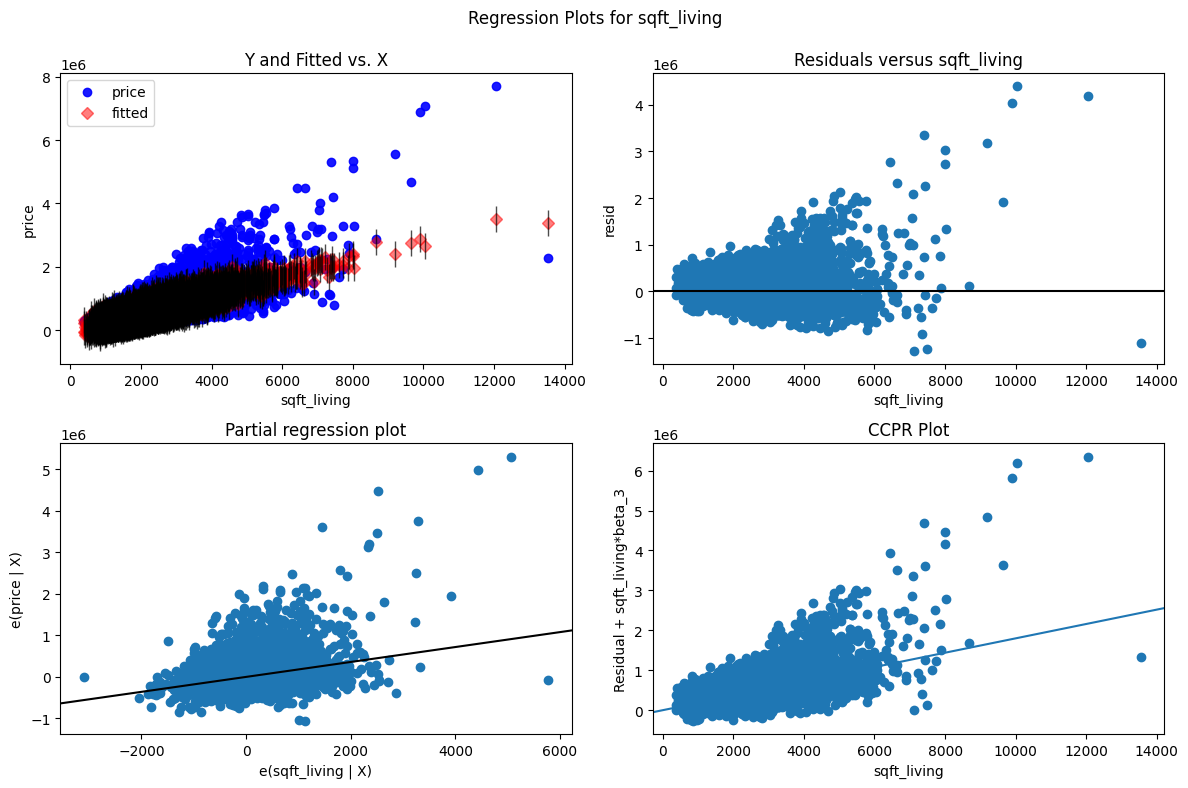

In [68]:
sm.graphics.plot_regress_exog(model, "sqft_living", fig=plt.figure(figsize=(12,8)));

1. The **Y and Fitted vs X** plot shows the observed values of the dependent variable against the predicted values. This plot helps assess the linearity assumption by examining the distribution of points around the diagonal line. The deviations indicate non-linearity.

2. The **Residuals versus sft_living** plot displays the residuals against the predicted values. This plot helps assess the assumption of constant variance (homoscedasticity). The increasing spread may indicate heteroscedasticity.

3. The **Partial regression** plot shows the standardized residuals (residuals divided by their standard deviation) against the predicted values. We can identify outliers from the plot. 

4. The **CCPR** plot helps assess the normality assumption of the residuals. 

### Visualization of the target variable.

Text(0.5, 1.0, 'transformed price')

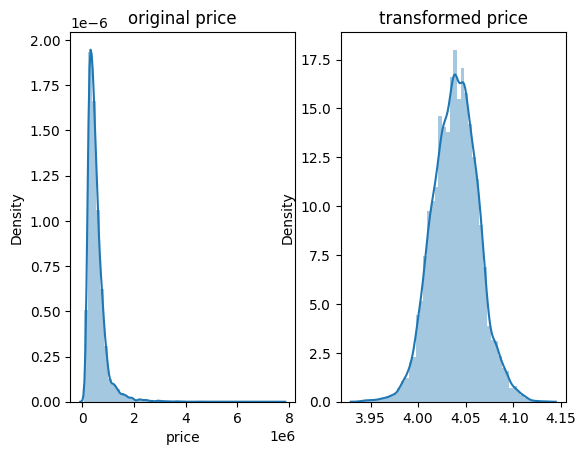

In [69]:
# Normalizing price
scaled_price=data['price']
norm_price=stats.boxcox(scaled_price)

fig, ax=plt.subplots(1,2)
sns.distplot(scaled_price, ax=ax[0])
ax[0].set_title('original price')
sns.distplot(norm_price[0], ax=ax[1])
ax[1].set_title('transformed price')

* We will apply log transformation to the target variable because of the following reasons:

1. In the regression analysis above the relationship between the predictors and the target variable appears to be multiplicative 
2. The target variable exhibits skewness (see the graph above).

By applying a log transformation to the target variable, we can potentially linearize the relationship and improve the model's performance.

In [70]:
#log transformation
y1 = np.log(house['price'])

* We will run the model again to check if there's any improvement.

In [71]:
model2 = sm.OLS(y1, sm.add_constant(X)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     6168.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:21:58   Log-Likelihood:                -1442.1
No. Observations:               21597   AIC:                             2908.
Df Residuals:                   21585   BIC:                             3004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -47.1663      0.694    -67.940      

## Final Model Observations

We can conclusively say that our model is statistically significant based on our p-values equal to zero. 

Our r-squared has improved, the model now explains about 76% of the variance in price. 

Coefficients: The coefficients represent the estimated 
effects of each predictor variable on the house prices. Here are some key coefficients and their interpretations:

1. An additonal **bedroom** is associated with reduction of $0.0141 in house 
   price.

2. An additional **bathroom** is associated with an increase of $0.0672 in  
   house price.
   
3. An additional unit in **square footage of living** space is associated with
    an increase of $0.0002 in house price. 10000 units in square foot of living space adds $2 in the price of the house

4. The older the house the lower the price (**yr_built**). An additional  
   **age** to the house reduces the house price by $0.0032

5. An improvement in renovation of the house is associated with $0.0785 in the 
    house price. 

6. A step higher in the **view**  scale is associated with an increase of $0. 
   0816 in house price.

7. A step higher in the **grade** scale is associated with an increase of $0. 
   1795 in house price.

8. Just like grade, a step higher in the **condition** scale is associated with 
   an increase of $0.1795 in house price.


Overall, the model suggests that the number of bedrooms, bathrooms, yr_built,renovation, sqft-living, view, grade, condition are important predictors of house prices. 




# 5.0 Model Evaluation

* Checking the distribution of the residuals using a qq plot.

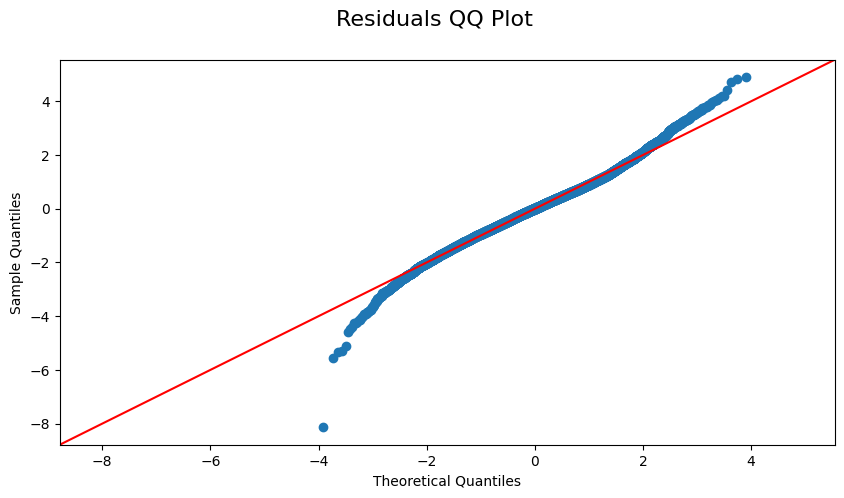

In [72]:
# Residual plot
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()


From the plot we can now say that it follows the normality assumption.

* We have a close to perfect goodness of fit.


In [73]:
# Adding a column of ones to account for the y-intercept
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Predict using the modified feature array with the y-intercept
y_pred = model2.predict(X_with_intercept)

In [74]:
# Assuming y_true contains the actual values and y_pred contains the predicted values
mae = mean_absolute_error(y1, y_pred)
mse = mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)


print('Model Mean Absolute Error:', mae)
print('Model Mean Standard Error:', mse)
print('Model Root Mean Standard Error:', rmse)

Model Mean Absolute Error: 0.19889299309258446
Model Mean Standard Error: 0.06691540133661557
Model Root Mean Standard Error: 0.25868011391797313


## Model Evaluation Observation

* The MAE value of 0.1988 suggests that on average, the model's predictions deviate from the true values by approximately 0.1988 units. The low MAE shows that our model performance is good.

* The MSE value of 0.0669 indicates that on average, the squared difference between the predicted values and the true values is approximately 0.0669. Similar to MAE, the low MSE value shows that our model performance is good.

* The RMSE value of 0.2587 suggests that on average, the model's predictions deviate from the true values by approximately 0.2587 units. Similar to MAE and MSE, the low RMSE shows that our model performance is good.



## Data Limitation

- Data is only from 2014 to 2015. Models to predict future sales price would need to be updated with newer data.
- Models to predict future sales price would need to be updated with newer data.
- Some data was missing requiring us to make assumptions that might have affected our model performance

# 6.0 Conclusions and Recommendations

## Conclusions:

1. Square foot of living, grade, square foot above, number of bathrooms and bedrooms, condition, square foot above, square foot of basement, waterfront, view, year the house was built, square foot lot, floors, whether renovated or not, latitiude and longitude significantly influence the price of a house. specifically, Square foot of living, grade, square foot above, bathrooms and view are the top 5 factors showing very high influence in the prices of a house.

2. The house grade and condition are very key factors in price of a house. The higher the house grade, the more price it fetches.
The Houses with average condition and above tend to fetch high prices. This could be because several factors e.g a house with average conditon and above could have been renovated, recently build or have a higher square foor of living. The features are highly dependent on each other.

3. From our analysis we can almost conclusively say that renovations have increased the quality of the house thereby increasing in price.









## Recommendations:



1.  Focus on Property Condition and Grade: Emphasize the significance of property condition and grade in determining house prices. Encourage renovations to improve the overall condition and raise the property's grade as this has a great impact on the value of a house.

2.   Highlight the significant impact of square footage of living space on house prices and use this information to justify higher listing prices for properties with more extensive square footage.

3.  The number of bathrooms and bedrooms also have a positive correlation with the value of a house. Therefore, during renovation adding may be a bedroom would increase the value of the house.

4. Based on the model, Sixth Sense agency should consider significant features such as grade, square footage of living etc to better advice home buyers on what they can afford based on their budget.








## Next Steps:

1. While the model provides insights into specific variables, remember to consider broader market trends and factors influencing real estate prices. Keep track of market conditions, economic indicators, and buyer preferences to provide clients with up-to-date and accurate advice.

2. Continuously Refine and Validate the Model: Understand the limitations and assumptions of the model and its applicability to specific markets. Continuously update and refine the model based on new data and incorporate local market knowledge to improve its accuracy and relevance.

